# Tarea Minería de Datos

## 1. Definir el problema y Objetivos

#### El objetivo es predecir si un estudiante aprobará o no el examen final en función de las variables.

### Descripción del Dataset

- Student_ID: Identificador del estudiante (no es relevante para el análisis).

- Gender: Género del estudiante.
- Study_Hours_per_Week: Horas de estudio a la semana.
- Attendance_Rate: Porcentaje de asistencia.
- Past_Exam_Scores: Nota de exámenes anteriores.
- Parental_Education_Level: Nivel educativo de los padres.
- Internet_Access_at_Home: Si tiene acceso a Internet en casa (Yes o No).
- Extracurricular_Activities: Si realiza actividades extracurriculares (Yes o No).
- Final_Exam_Score: Nota del examen final.
- Pass_Fail: Etiqueta de si el estudiante aprobó (Pass) o reprobó (Fail).

## 2. Búsqueda y Adquisición de Datos

#### El dataset utilizado es el student_performance_dataset.csv, encontrado en Kaggle

https://www.kaggle.com/datasets/amrmaree/student-performance-prediction?resource=download

## 3. Preparar el entorno de trabajo



In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## 4. Exploración de Datos (Data Exploration)

#### Carga de datos

In [137]:
df = pd.read_csv(r"C:\Users\USUARIO\Documents\Curso IA y Big Data\Sistemas de Big Data\Tema 5 Analisis\Tarea Mineria de Datos\data\student_performance_dataset.csv")
df.head() # Visualiza las primeras filas


,Student_ID,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
0,S147,Male,31,68.267841,86,High School,Yes,Yes,63,Pass
1,S136,Male,16,78.222927,73,PhD,No,No,50,Fail
2,S209,Female,21,87.525096,74,PhD,Yes,No,55,Fail
3,S458,Female,27,92.076483,99,Bachelors,No,No,65,Pass
4,S078,Female,37,98.655517,63,Masters,No,Yes,70,Pass


#### Análisis descriptivo

In [138]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  708 non-null    object 
 1   Gender                      708 non-null    object 
 2   Study_Hours_per_Week        708 non-null    int64  
 3   Attendance_Rate             708 non-null    float64
 4   Past_Exam_Scores            708 non-null    int64  
 5   Parental_Education_Level    708 non-null    object 
 6   Internet_Access_at_Home     708 non-null    object 
 7   Extracurricular_Activities  708 non-null    object 
 8   Final_Exam_Score            708 non-null    int64  
 9   Pass_Fail                   708 non-null    object 
dtypes: float64(1), int64(3), object(6)
memory usage: 55.4+ KB


,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Final_Exam_Score
count,708.000000,708.000000,708.000000,708.000000
mean,26.132768,78.107722,77.871469,58.771186
std,8.877727,13.802802,14.402739,6.705877
min,10.000000,50.116970,50.000000,50.000000
25%,19.000000,67.550094,65.000000,52.000000
50%,27.000000,79.363046,79.000000,59.500000
75%,34.000000,89.504232,91.000000,64.000000
max,39.000000,99.967675,100.000000,77.000000


In [139]:
# Revisar valores nulos
df.isnull().sum()

Student_ID                    0
Gender                        0
Study_Hours_per_Week          0
Attendance_Rate               0
Past_Exam_Scores              0
Parental_Education_Level      0
Internet_Access_at_Home       0
Extracurricular_Activities    0
Final_Exam_Score              0
Pass_Fail                     0
dtype: int64

### Visualización inicial

#### Distribuciones

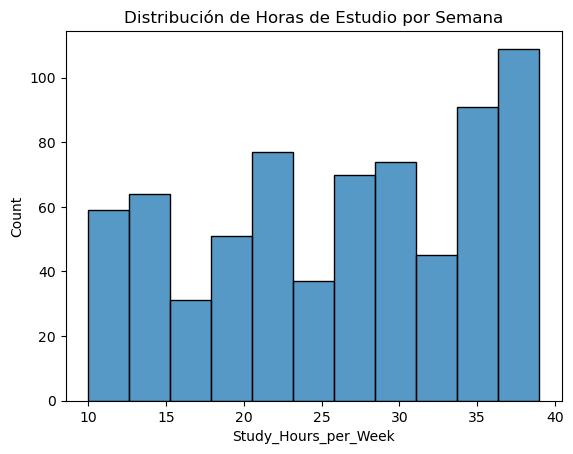

In [140]:
sns.histplot(df['Study_Hours_per_Week'])
# plt.title("Distribución de Horas de Estudio")
plt.title("Distribución de Horas de Estudio por Semana")
plt.show()

#### Relaciones

- Relación entre horas de estudio y aprobación

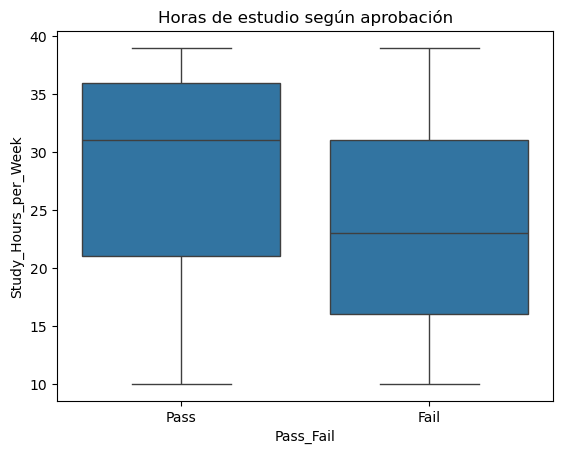

In [141]:
sns.boxplot(x='Pass_Fail', y='Study_Hours_per_Week', data=df)
plt.title("Horas de estudio según aprobación")
plt.show()

- Relación entre asistencia y aprobación

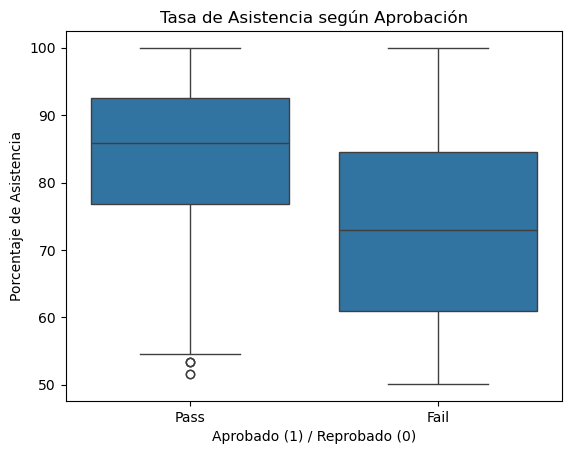

In [142]:
sns.boxplot(x='Pass_Fail', y='Attendance_Rate', data=df)
plt.title("Tasa de Asistencia según Aprobación")
plt.xlabel("Aprobado (1) / Reprobado (0)")
plt.ylabel("Porcentaje de Asistencia")
plt.show()

## 5. Preprocesamiento de Datos

#### Limpieza

- Revisar valores nulos e inconsistentes

In [143]:
df.isnull().sum()

Student_ID                    0
Gender                        0
Study_Hours_per_Week          0
Attendance_Rate               0
Past_Exam_Scores              0
Parental_Education_Level      0
Internet_Access_at_Home       0
Extracurricular_Activities    0
Final_Exam_Score              0
Pass_Fail                     0
dtype: int64

#### Transformación

- Convierte variables categóricas a numéricas (codificación).

In [144]:
df["Gender"] = df["Gender"].map({"Male": 0, "Female": 1})
df["Internet_Access_at_Home"] = df["Internet_Access_at_Home"].map({"Yes": 1, "No": 0})
df["Extracurricular_Activities"] = df["Extracurricular_Activities"].map({"Yes": 1, "No": 0})
df = pd.get_dummies(df, columns=["Parental_Education_Level"], drop_first=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Student_ID                            708 non-null    object 
 1   Gender                                708 non-null    int64  
 2   Study_Hours_per_Week                  708 non-null    int64  
 3   Attendance_Rate                       708 non-null    float64
 4   Past_Exam_Scores                      708 non-null    int64  
 5   Internet_Access_at_Home               708 non-null    int64  
 6   Extracurricular_Activities            708 non-null    int64  
 7   Final_Exam_Score                      708 non-null    int64  
 8   Pass_Fail                             708 non-null    object 
 9   Parental_Education_Level_High School  708 non-null    bool   
 10  Parental_Education_Level_Masters      708 non-null    bool   
 11  Parental_Education_

- Selección de características

---------------------------------------------

In [145]:
# Rellenar valores nulos solo en las columnas numéricas
#df.fillna(df.select_dtypes(include=["number"]).mean(), inplace=True)

In [146]:
# Convertir variables categóricas en valores numéricos
#df["Gender"] = df["Gender"].map({"Male": 0, "Female": 1})
#df["Internet_Access_at_Home"] = df["Internet_Access_at_Home"].map({"Yes": 1, "No": 0})
#df["Extracurricular_Activities"] = df["Extracurricular_Activities"].map({"Yes": 1, "No": 0})
#df = pd.get_dummies(df, columns=["Parental_Education_Level"], drop_first=True)


In [147]:
# Variables predictoras (excluyendo Student_ID y Pass_Fail)
#X = df.drop(columns=["Student_ID", "Pass_Fail"])

# Variable objetivo (1 para "Pass", 0 para "Fail")
#y = df["Pass_Fail"].map({"Pass": 1, "Fail": 0})

# Separar en 80% entrenamiento y 20% prueba
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
